## Restaurant Rating Prediction

Problem Statement : Given is a dataset containing the data about orders placed on zomato for the restaurants in Banglore. We have to predict the overall rating of the restaurant based on various factors.

## column Description

- url: contains the url of the restaurant in the zomato website
- address: contains the address of the restaurant in Bengaluru
- name: contains the name of the restaurant
- online_order: whether online ordering is available in the restaurant or not
- book_table: table book option available or not
- rate: contains the overall rating of the restaurant out of 5
- votes: contains total number of rating for the restaurant as of the above mentioned date
- phone: contains the phone number of the restaurant
- location: contains the neighborhood in which the restaurant is located
- rest_type: restaurant type
- dish_liked: dishes people liked in the restaurant
- cuisines: food styles, separated by comma
- approx_cost(for two people): contains the approximate cost for meal for two people
- reviews_list: list of tuples containing reviews for the restaurant, each tuple
- menu_item: contains list of menus available in the restaurant
- listed_in(type): type of meal
- listed_in(city): contains the neighborhood in which the restaurant is listed

## Importing Required Libraries

In [19]:
import numpy as np                     
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns              
%matplotlib inline
sns.set()                    

import warnings
warnings.filterwarnings('ignore')

## Load and analyze the Dataset

In [20]:
# Importing the Dataset
df = pd.read_csv("zomato.csv")
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


## Size of the Dataset

In [21]:
df.shape

(51717, 17)

Outcome : There are 51717 rows and 17 columns in our Dataset.

## Columns in the Dataset

In [22]:
df.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Here, we can see the list of columns in which some of the columns are important and some are not to much important in the context of the problem. So, further we drop and process the data.

## Renaming Column

In [23]:
# Renaming the column approx_cost(for two people) with approx_cost.

df.rename(columns = {'approx_cost(for two people)' : 'approx_cost'}, inplace = True)

## Data Cleaning

-Now, we clean our data by dropping the irrelevant columns, handling the wrong datatypes, handling the null values and the outliers.

## Dropping Irrelevant Columns

In [24]:
# Here, url, address, menu_item, reviews_list, dish_liked, phone, listed_in(type) are irrelevant for 
# the problem's solution

df.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)','listed_in(city)'],axis=1,inplace=True)

In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


## Checking and Handling the Datatypes

In [26]:
# Checking the types of data present in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


From above result, we can see that the columns { rate, location, rest_type, approx_cost, cuisines } either have null values, wrong datatypes or both.

## Rate Column

In [27]:
# Checking the unique values in the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Observation: There are many null values and garbage values in rate columns.

In [28]:
# Replacing all the null values and garbage values with numbers.
df['rate'] =  df['rate'].str.replace("/5", "")
df['rate'] =  df['rate'].str.replace("NEW", "NaN")
df['rate'] =  df['rate'].str.replace("nan", "NaN")
df['rate'] =  df['rate'].str.replace("-", "NaN")
df['rate'] =  df['rate'].str.replace(" ", "")
df['rate'] =  df['rate'].fillna(np.nan)

In [29]:
# Verifying the results
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [30]:
# Changing the Datatype of Rate column from object to float
df['rate'] = df['rate'].astype(float)

## Approx Cost Column

In [31]:
# Checking the unique values in the Approx Cost column of the Dataset
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [32]:
df['approx_cost'].isnull().sum()

346

In [33]:
# Replacing the null values and make it able to convert 
df['approx_cost'] =  df['approx_cost'].str.replace("nan", "NaN")
df['approx_cost'] =  df['approx_cost'].fillna('NaN')
df['approx_cost'] =  df['approx_cost'].str.replace(",", "")

In [34]:
# Verifying the Results
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [35]:
df['approx_cost'].isnull().sum()

0

In [36]:
# Changing the Datatype of the column from Object to Float
df['approx_cost'] = df['approx_cost'].astype(float)

In [37]:
# Again, checking the datatypes of columns to verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


## Checking for Null Values

In [38]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
dtype: int64

In [39]:
# Checking of Percentage of Null values in Each Column
(df.isna().sum() / df.shape[0]) * 100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
dtype: float64

Here, we can see that columns location, rest_type, cuisines, approx_cost have less number of null values as compared to rate column. So, we can drop that null values.

In [40]:
# Here, we dropping the null values from the columns having lesser number of null values

df = df[df['location'].notna()]
df = df[df['rest_type'].notna()]
df = df[df['cuisines'].notna()]
df = df[df['approx_cost'].notna()]

In [41]:
# Verifying the results
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
dtype: int64

In [42]:
# Imputing the null values with median of rate column
df['rate'] = df['rate'].fillna(df['rate'].median())

# Verifying the Results
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
dtype: int64

In [48]:
# After dropping the values, we will reset the index
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


## Data Visualization

- Now, we visualize our data based on different parameters to understand the relations and some insights from out dataset.

## No. of orders vs Restaurants

In [57]:
len(df['name'].unique())

8723

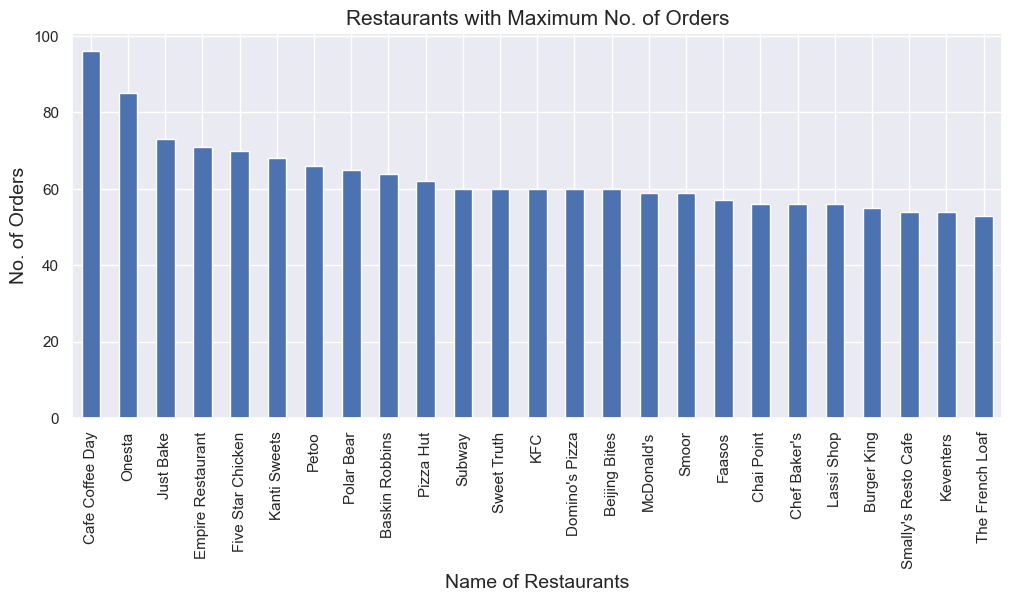

In [60]:
plt.figure(figsize = (12,5))
data = df['name'].value_counts()[:25]
data.plot(kind = 'bar')
plt.xlabel('Name of Restaurants', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title("Restaurants with Maximum No. of Orders", fontsize=15)
plt.show()

Above Bar chart shows that the Cafe Coffee Day and Onesta got higher number of orders as compared to others.

## Number of Restaurants having Online Order Facility

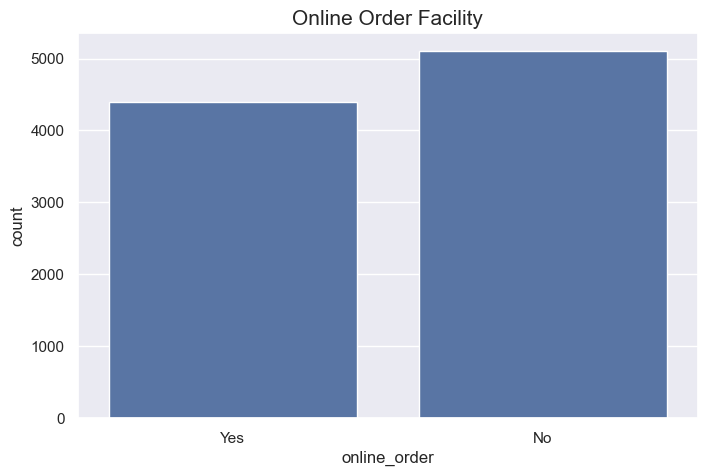

In [61]:
data = df[['name', 'online_order']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x="online_order", data=data).set_title('Online Order Facility',fontsize = 15)
plt.show()

## Number of restaurants having Prebooking Table Facility

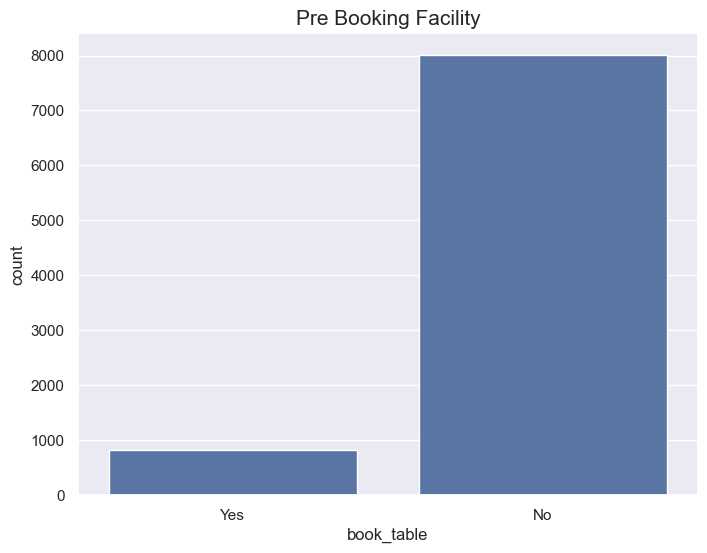

In [62]:
data = df[['name', 'book_table']].drop_duplicates()

plt.figure(figsize = (8,6))
ax = sns.countplot(x="book_table", data=data).set_title('Pre Booking Facility', fontsize = 15)
plt.show()

## Top Locations got Higher Number of Orders

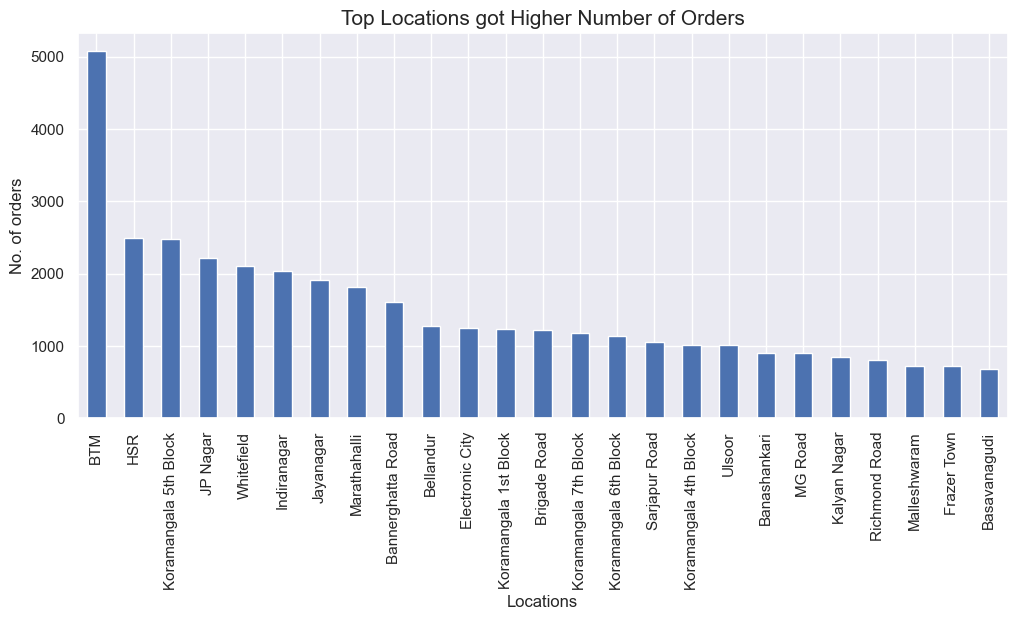

In [63]:
plt.figure(figsize = (12,5))
data = df.location.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('No. of orders')
plt.title ('Top Locations got Higher Number of Orders', size = 15)
plt.show()

Above visualization shows that Location BTM got higher number of orders among all others locations.

## Most Common Ratings for orders

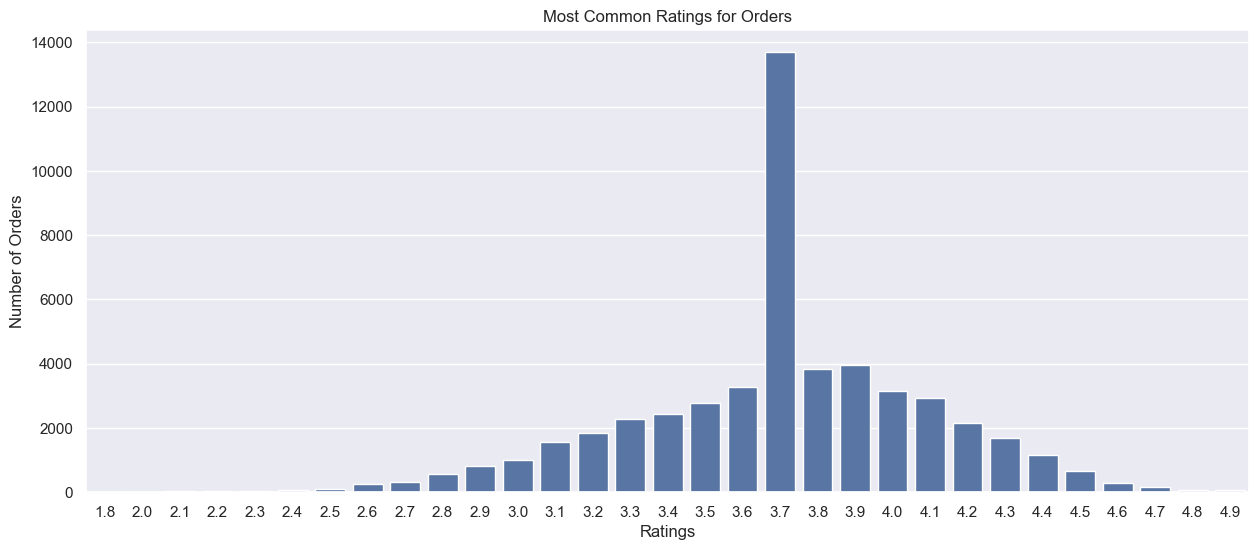

In [64]:
data = df['rate'].value_counts().sort_index()
plt.figure(figsize = (15,6))
sns.barplot(x=data.index, y=data.values)
plt.xlabel('Ratings')
plt.ylabel('Number of Orders')
plt.title('Most Common Ratings for Orders')
plt.show()

## Approximate Costs for meal of two people

In [65]:
data = pd.DataFrame(df["approx_cost"].value_counts().reset_index()[:25])
data.columns = ['approx_cost', 'count']
data = data.set_index('approx_cost')

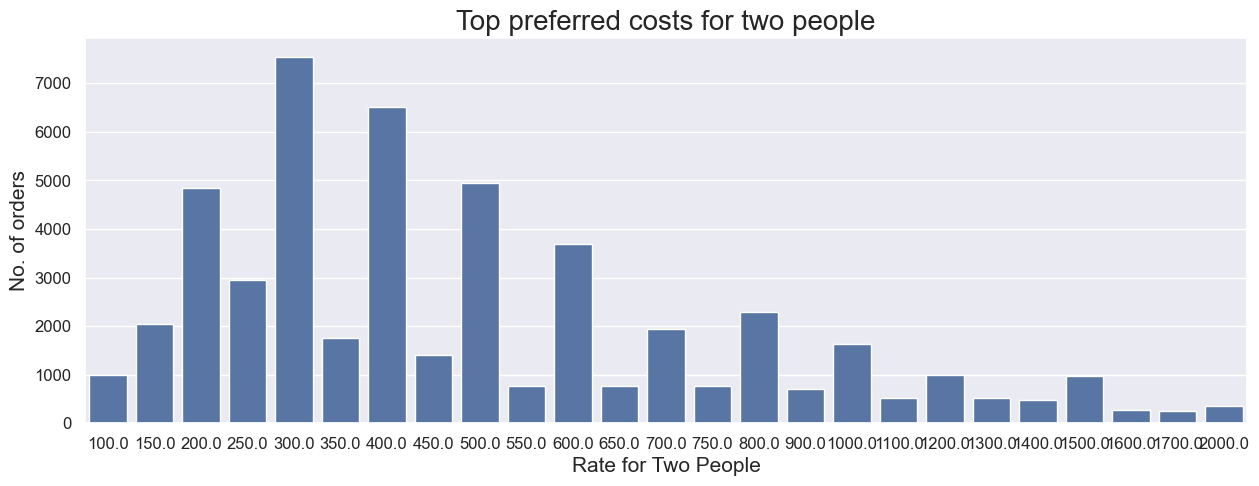

In [66]:
plt.figure(figsize = (15, 5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for Two People', size=15)
plt.ylabel('No. of orders', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top preferred costs for two people', size = 20)
plt.show()

## Restaurant Type vs No. of orders

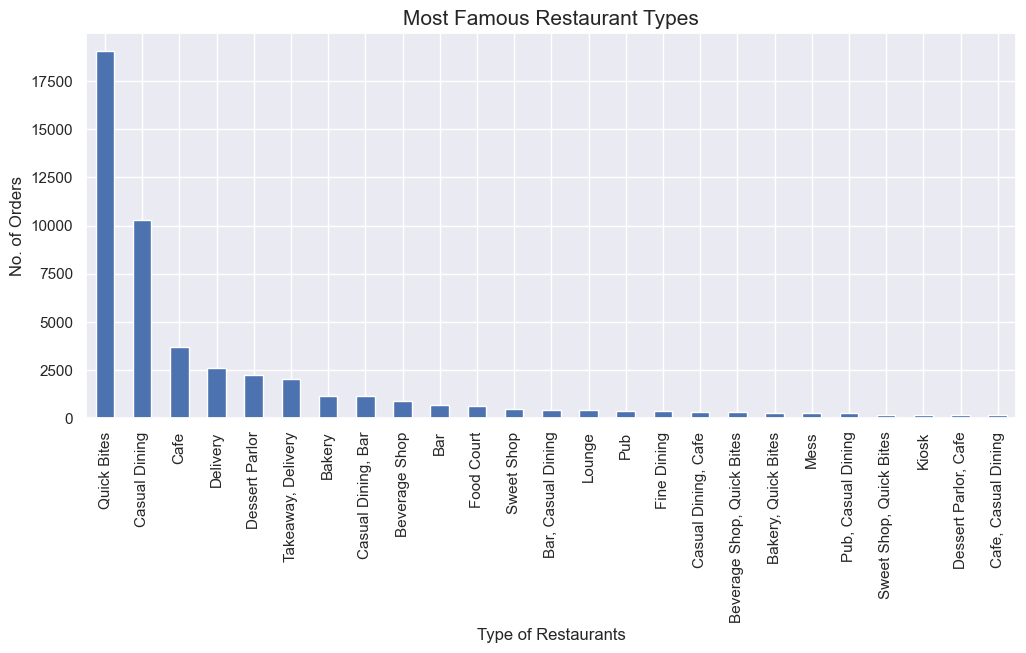

In [67]:
plt.figure(figsize=(12,5))
ax = df.rest_type.value_counts()[:25]
ax.plot(kind='bar')
plt.title("Most Famous Restaurant Types",fontsize=15)
plt.xlabel("Type of Restaurants")
plt.ylabel("No. of Orders")
plt.show()

## Most famous Cusines among People

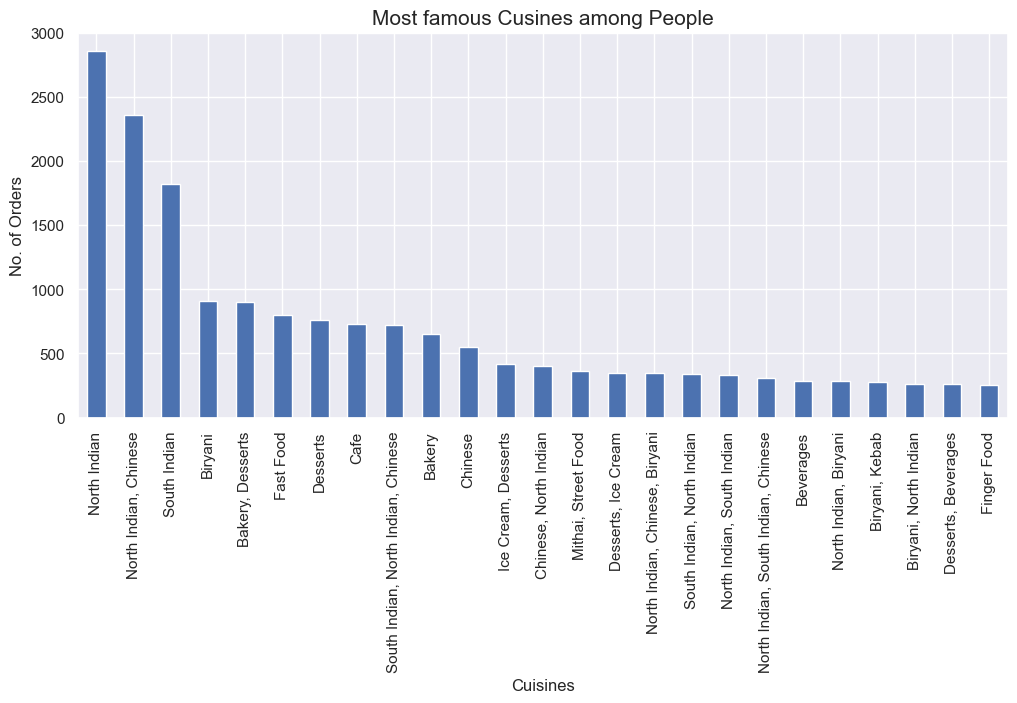

In [68]:
plt.figure(figsize=(12,5))
ax = df.cuisines.value_counts()[:25].plot(kind='bar')
plt.title("Most famous Cusines among People",fontsize=15)
plt.xlabel("Cuisines")
plt.ylabel ("No. of Orders")
plt.show()

## Top Locations with Most Number of Restaurants

In [69]:
top_areas = pd.DataFrame(df.groupby(by='location')['name'].nunique())
top_areas.columns = ['count']
top_areas.sort_values(by='count', ascending= False, inplace=True)

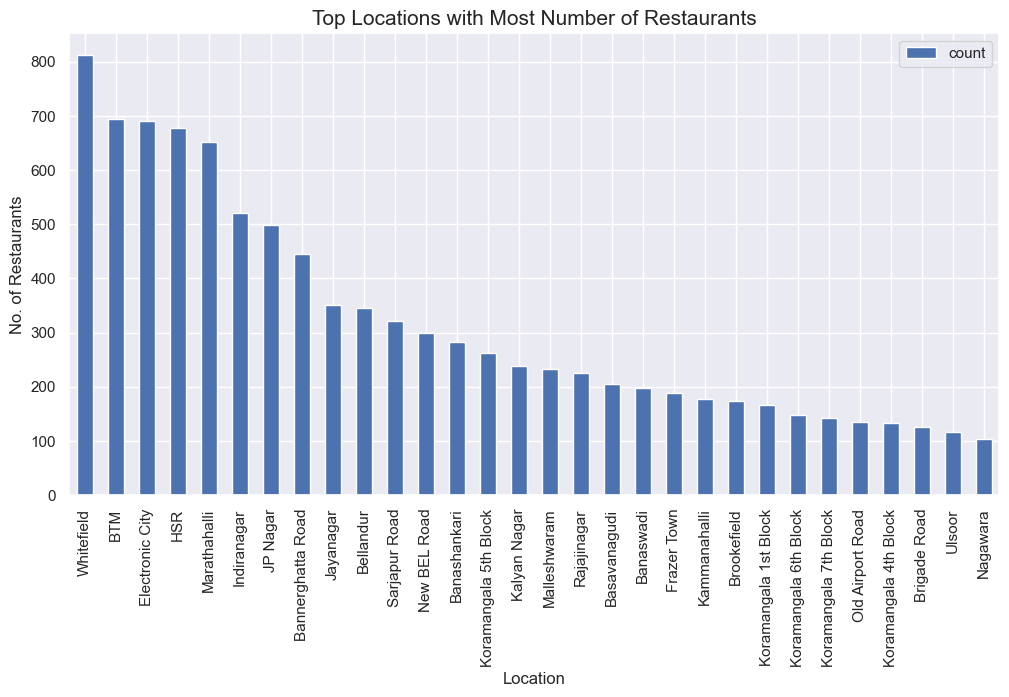

In [70]:
plt.rcParams['figure.figsize'] = (12,6)
ax = top_areas[0:30].plot(kind='bar')
plt.xlabel('Location', size = 12)
plt.ylabel('No. of Restaurants', size = 12)
plt.title('Top Locations with Most Number of Restaurants', size = 15)
plt.show()

In [71]:
df.to_csv('output.csv')